# Question 8

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

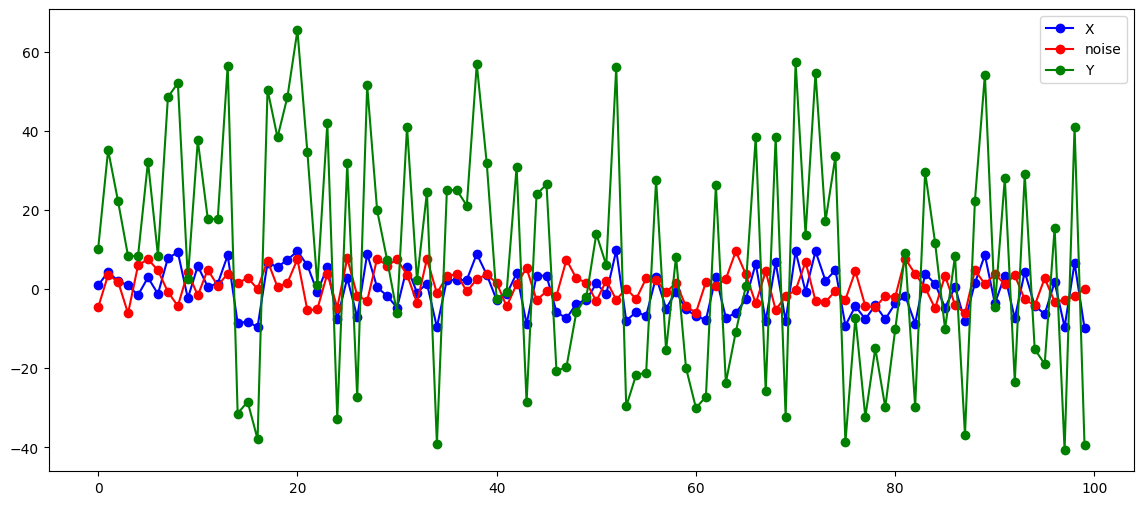

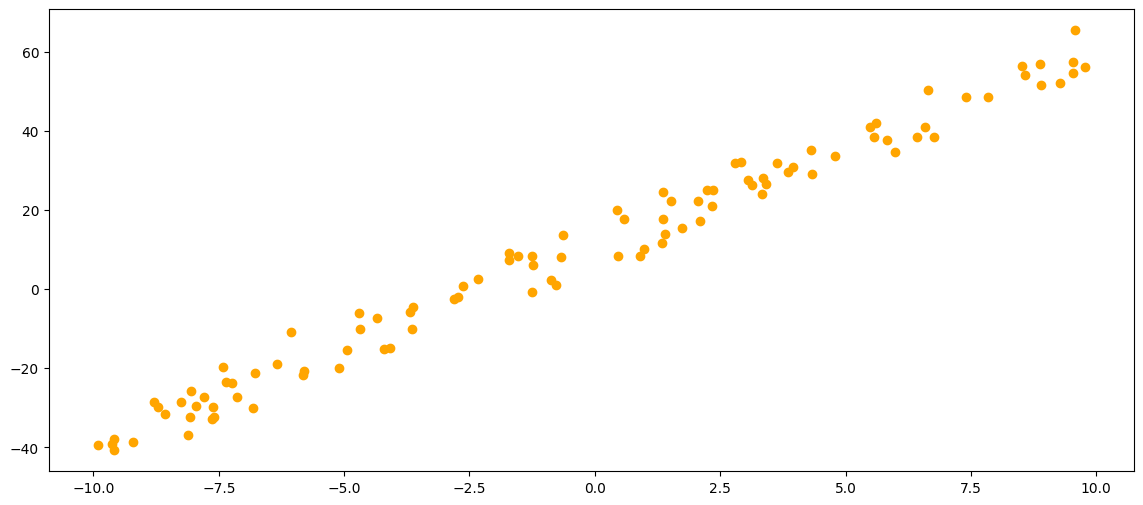

In [132]:

np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
X = X.reshape(-1, 1)

sigma = 4
noise = np.random.normal(0, sigma, 100)
noise = noise.reshape ( -1,1)

Y = 5*X + 10 +noise

plt.figure(figsize = (14,6))
plt.plot(X, marker='o', linestyle='-', color='blue', label='X')
plt.plot(noise, marker='o', linestyle='-', color='red', label='noise')
plt.plot(Y, marker='o', linestyle='-', color='green', label='Y')
plt.legend()
plt.show()


plt.figure(figsize = (14,6))
plt.scatter(X, Y, color='orange', label='Y vs X')
plt.show()

## A

In [133]:
x_train=X[:80]
x_test=X[80:]


y_train=Y[:80]
y_test=Y[80:]

## B

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
print("MEAN SQUARE ERROR : ", mse)

MEAN SQUARE ERROR :  14.401312996166405


## C

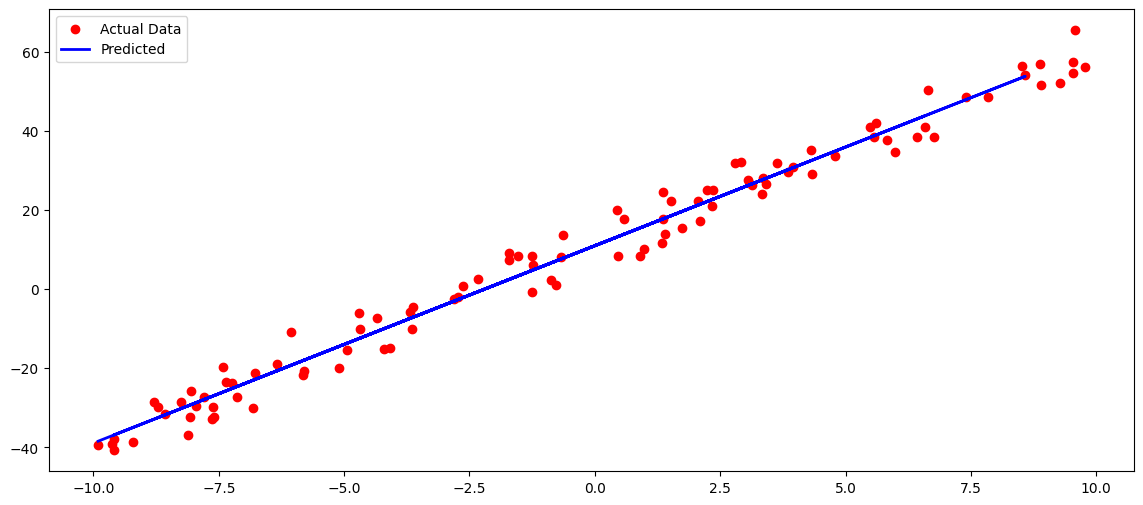

In [135]:

plt.figure(figsize = (14,6))
plt.scatter(X, Y, color='red',label="Actual Data")
plt.plot(x_test, y_predicted, color='blue', linewidth=2, label="Predicted")
plt.legend()
plt.show()

## D -> Degree 2

MEAN SQUARE ERROR :  3823.128227410747


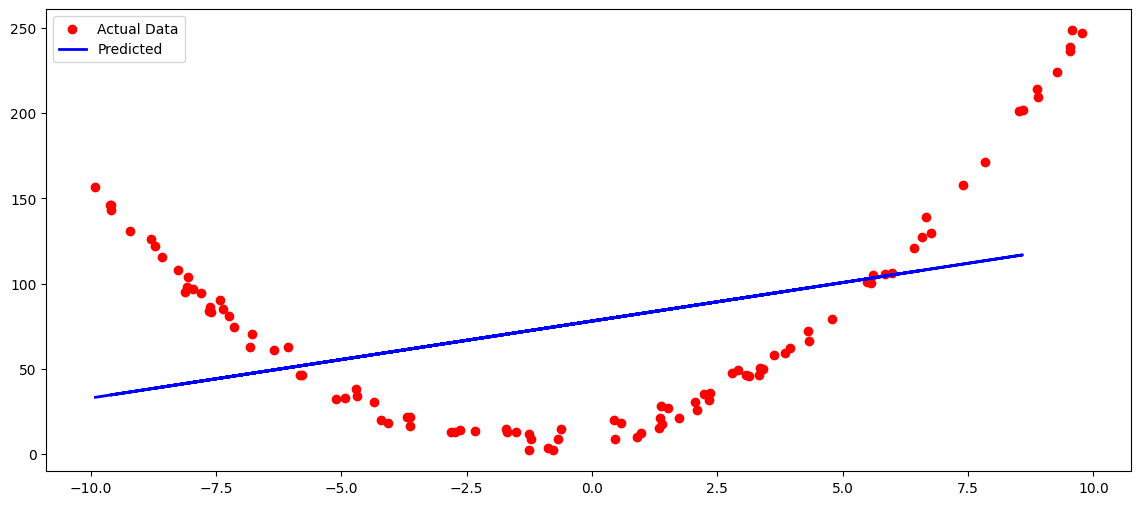

In [136]:

np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
X = X.reshape(-1, 1)

sigma = 4
noise = np.random.normal(0, sigma, 100)
noise = noise.reshape ( -1,1)

Y = 2*np.square(X) + 5*X + 10 +noise

x_train=X[:80]
x_test=X[80:]
y_train=Y[:80]
y_test=Y[80:]


model = LinearRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
print("MEAN SQUARE ERROR : ", mse)


plt.figure(figsize = (14,6))
plt.scatter(X, Y, color='red',label="Actual Data")
plt.plot(x_test, y_predicted, color='blue', linewidth=2, label="Predicted")
plt.legend()
plt.show()

## D -> Degree 3

MEAN SQUARE ERROR :  24485.761226017676


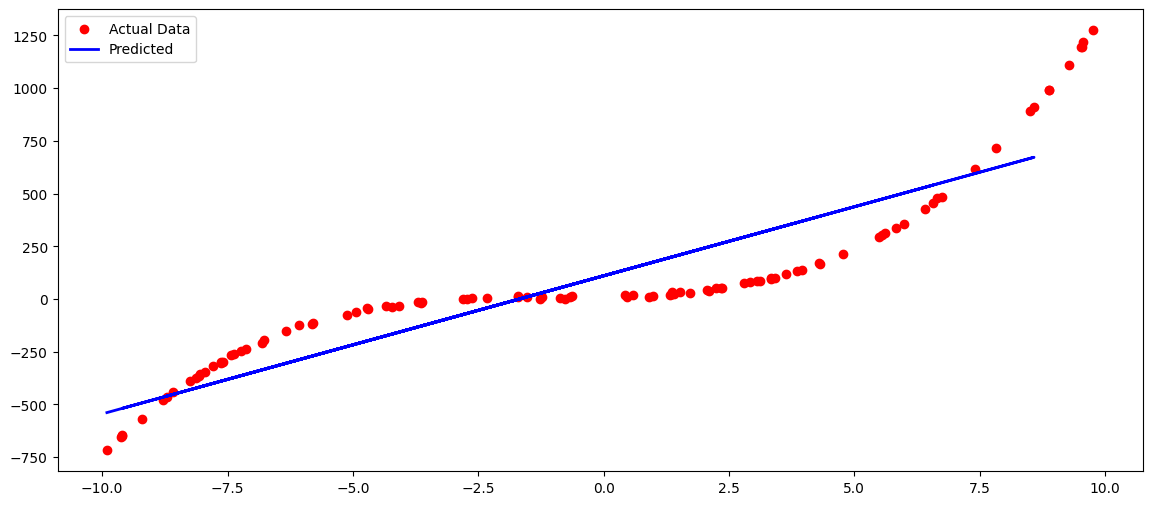

In [137]:

np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
X = X.reshape(-1, 1)

sigma = 4
noise = np.random.normal(0, sigma, 100)
noise = noise.reshape ( -1,1)

Y = np.square(X)*X + 3*np.square(X) + 5*X + 10 +noise

x_train=X[:80]
x_test=X[80:]
y_train=Y[:80]
y_test=Y[80:]


model = LinearRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
print("MEAN SQUARE ERROR : ", mse)


plt.figure(figsize = (14,6))
plt.scatter(X, Y, color='red',label="Actual Data")
plt.plot(x_test, y_predicted, color='blue', linewidth=2, label="Predicted")
plt.legend()
plt.show()

# Question 9

In [138]:
from google.colab import files
uploaded = files.upload()

Saving A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv to A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63 (4).csv


In [139]:
data = pd.read_csv('A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv')
data

,Samples,Feature 1,Feature 2,Output
0,1,0.7,48000,1
1,2,1.9,48000,0
2,3,2.5,60000,1
3,4,4.2,63000,0
4,5,6.0,76000,0
...,...,...,...,...
195,196,6.5,84000,0
196,197,6.9,73000,0
197,198,5.1,72000,0
198,199,9.1,69000,1


In [140]:
data['Bias'] = 1

x = data[['Bias', 'Feature 1', 'Feature 2']].values
y = data['Output'].values

from sklearn.preprocessing import StandardScaler

# Normalize features (excluding bias term)
scaler = StandardScaler()
x[:, 1:] = scaler.fit_transform(x[:, 1:])
x

array([[ 1.        , -1.51324933, -1.20660229],
       [ 1.        , -1.09075068, -1.20660229],
       [ 1.        , -0.87950136, -0.43231205],
       [ 1.        , -0.2809616 , -0.23873949],
       [ 1.        ,  0.35278637,  0.60007494],
       [ 1.        ,  0.52882748,  0.14840563],
       [ 1.        ,  0.88090968,  0.60007494],
       [ 1.        ,  1.09215901,  1.37436518],
       [ 1.        ,  1.30340833,  1.05174424],
       [ 1.        ,  1.7611152 ,  1.05174424],
       [ 1.        , -1.47804111, -1.52922322],
       [ 1.        , -1.1259589 , -0.43231205],
       [ 1.        ,  1.7611152 ,  0.7936475 ],
       [ 1.        ,  0.38799459,  0.60007494],
       [ 1.        , -1.26679178, -1.07755392],
       [ 1.        ,  1.44424122,  1.63246192],
       [ 1.        ,  0.28236993,  0.53555075],
       [ 1.        ,  0.07112061,  0.14840563],
       [ 1.        , -1.40762467, -0.6904088 ],
       [ 1.        ,  0.35278637,  0.01935726],
       [ 1.        , -0.03450406,  0.471

In [141]:


def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squares(x_dot_w, y):
  predictions = sigmoid(x_dot_w)
  mse = np.mean((predictions - y) ** 2)
  return mse

def differential(x, y, w):
    predictions = sigmoid(np.dot(x, w))
    gradient = (2 / len(y)) * np.dot(x.T, (predictions - y) * predictions * (1 - predictions))
    return gradient

def update_using_gradient_descent_and_return_mse (x, y, w, learning_rate ):
    gradient = differential (x,y,w)
    w = w - learning_rate * gradient
    mse = mean_squares (np.dot(x, w), y)
    return mse, w




## Learning rate = 0.01 and 0.05

parameters for learning rate 0.01 :  [ 9.99763329 10.00161241 10.00057583]
parameters for learning rate 0.05 :  [ 9.98819184 10.00804376 10.00286708]


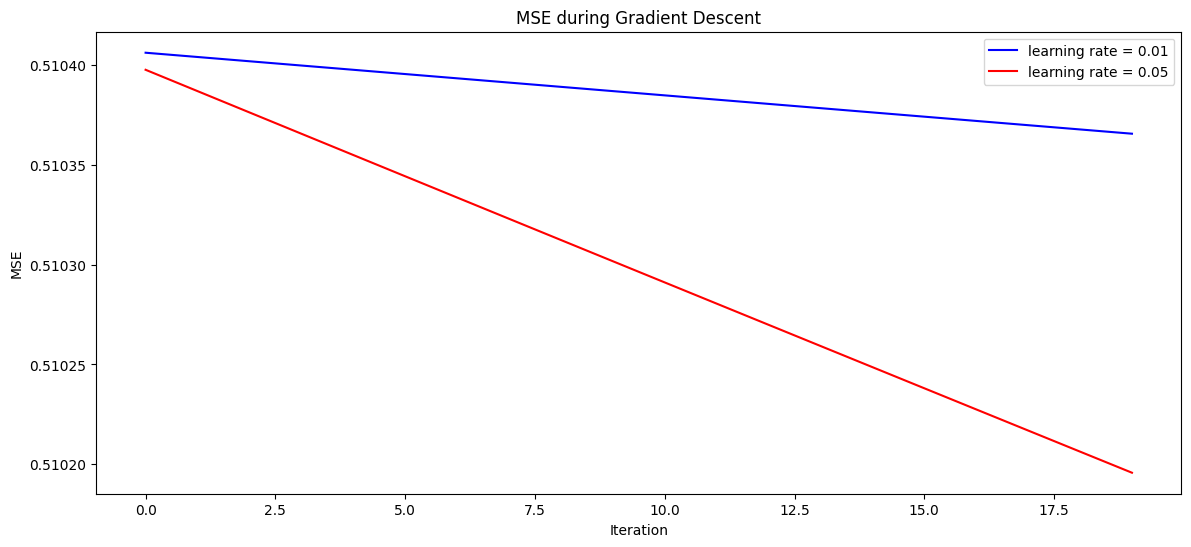

In [142]:
w = np.array([10, 10,10 ])
mse_a = []
for i in range(20) :
  mse_value ,w = update_using_gradient_descent_and_return_mse(x,y,w,0.01)
  mse_a.append( mse_value )

print("parameters for learning rate 0.01 : ", w)
w = np.array([10, 10,10 ])


mse_b = []
for i in range(20) :
  mse_value ,w = update_using_gradient_descent_and_return_mse(x,y,w,0.05)
  mse_b.append(mse_value)
print("parameters for learning rate 0.05 : ", w)


plt.figure ( figsize = (14,6))
plt.plot(range(20), mse_a, label = 'learning rate = 0.01', color = "blue")
plt.plot(range(20), mse_b, label = 'learning rate = 0.05', color = "red")
plt.title('MSE during Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()



## we can see that the curve is almost straight line for 20 iterations, so for 5000 iterations, we can observe curve nature

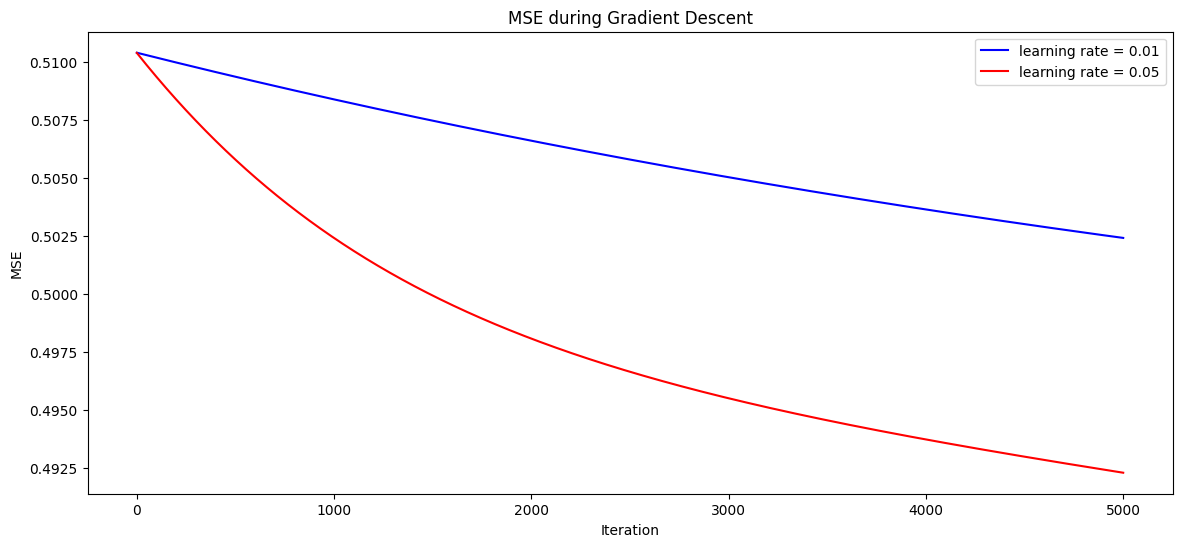

In [143]:
w = np.array([10, 10,10 ])
mse_a = []
for i in range(5000) :
  mse_value ,w = update_using_gradient_descent_and_return_mse(x,y,w,0.01)
  mse_a.append( mse_value )

w = np.array([10, 10,10 ])
mse_b = []
for i in range(5000) :
  mse_value ,w = update_using_gradient_descent_and_return_mse(x,y,w,0.05)
  mse_b.append(mse_value)

plt.figure ( figsize = (14,6))
plt.plot(range(5000), mse_a, label = 'learning rate = 0.01', color = "blue")
plt.plot(range(5000), mse_b, label = 'learning rate = 0.05', color = "red")
plt.title('MSE during Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Question 10

In [144]:
from google.colab import files
uploaded = files.upload()

Saving A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7.csv to A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7 (2).csv


In [145]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7.csv')

x = data[['Feature_0','Feature_1', 'Feature_2','Feature_3', 'Feature_4','Feature_5','Feature_6', 'Feature_7','Feature_8', 'Feature_9']]
y = data['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


## a

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)
mse1 =mean_squared_error(y_test,y_predicted)
coeff1 = []
for i in range(len(model.coef_)):
  coeff1.append(model.coef_[i])

print("MSE : ", mse1)
print("Coefficients in order : ", coeff1)

MSE :  2.5936681528516603
Coefficients in order :  [4.9355568107002465, -2.900356975851975, 1.9768943610402696, 0.0029935450681373155, -0.23803658534888428, 0.1769350442133295, -0.3309127443373934, 0.8615102237123083, -1.8903858290028577, 3.9546742435157936]


## b

In [147]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Lasso(alpha=1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)
mse2 =mean_squared_error(y_test,y_predicted)
coeff2 = []

for i in range(len(model.coef_)):
  coeff2.append(model.coef_[i])

print("MSE : ", mse2)
print("Coefficients in order : ", coeff2)

MSE :  8.762840369431851
Coefficients in order :  [3.673173589291623, -1.817349675866928, 1.0691304211191366, -0.0, -0.0, 0.0, -0.0, 0.0, -0.6133953143361882, 3.5406042265777335]


## c

In [148]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)
mse3 =mean_squared_error(y_test,y_predicted)
coeff3 = []

for i in range(len(model.coef_)):
  coeff3.append(model.coef_[i])

print("MSE : ", mse3)
print("Coefficients in order : ", coeff3)

MSE :  2.5932817297622526
Coefficients in order :  [4.473995906322452, -2.9990477789034085, 2.019050696747233, 0.002841885511657241, -0.24993837349037912, 0.17648775395075192, -0.3065974594610792, 0.768322306265099, -1.8146974353642387, 4.068218729732321]


## d

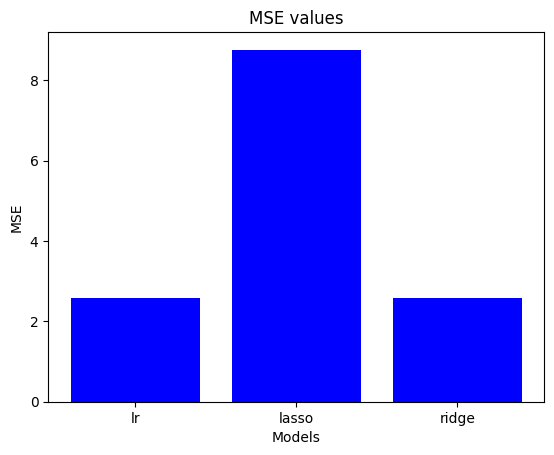

In [149]:
labels = ['lr', 'lasso', 'ridge']
values = [mse1, mse2, mse3]
plt.bar(labels, values, color=['blue'])

plt.title("MSE values")
plt.xlabel("Models")
plt.ylabel("MSE")
plt.show()


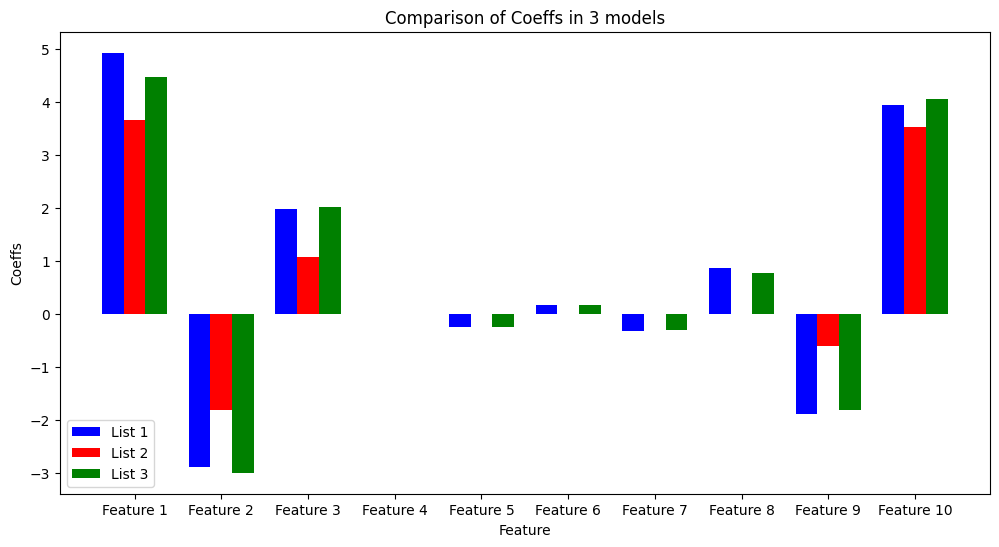

In [150]:


# Create an array for the x positions of the bars
x = np.arange(len(coeff1))  # Positions for each group

# Width of each bar
bar_width = 0.25

plt.figure(figsize = (12,6))
plt.bar(x - bar_width, coeff1, bar_width, label='List 1', color='blue')
plt.bar(x, coeff2, bar_width, label='List 2', color='red')
plt.bar(x + bar_width, coeff3, bar_width, label='List 3', color='green')


plt.title("Comparison of Coeffs in 3 models")
plt.xlabel("Feature")
plt.ylabel("Coeffs")

plt.legend()
plt.xticks(x, [f'Feature {i+1}' for i in x])
plt.show()
